In [2]:
# Import python modules

import warnings
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


In [4]:
df = pd.read_csv('/Users/adars/Documents/ML/Assignment 1/EnergyEfficiencyCooling.csv', header=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.61


In [9]:
#Showing the first five rows of the dataframe
df[1:5]

,X1,X2,X3,X4,X5,X6,X7,X8,Y
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

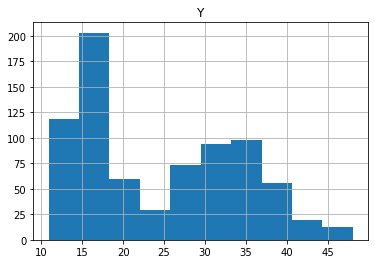

In [10]:
#Plotting the histogram for the column 'Y'
df.hist(column='Y')

In [13]:
#Counting the total number of missing values
df.isna().values.any()
df['Y'].isnull().sum()


5

In [25]:
#filling the missing values with the median value

median = df["Y"].median()
median
df["Y"] = df["Y"].fillna(median)

# The first value in column Y was null and now replaced by the median value
#check df
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,22.07
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.61


In [40]:
#first five values of the target column

five_elements_in_Y = df['Y'][1:6]
print(five_elements_in_Y )

1    21.33
2    21.33
3    21.33
4    28.28
5    25.38
Name: Y, dtype: float64


In [87]:
# Make a deep copy of the DataFrame object

df_copy = df.copy() 

i = 0

#Looping inside every elemets in Y

for y in (df_copy["Y"] ):
    if y > 30 :
        df_copy["Y"][i] = 1
        i = i+1
    else:
        df_copy["Y"][i] = 0
        i = i+1
#display the new datasheet
df_copy

#converting to integer type
df_copy["Y"] = df_copy["Y"].astype(int)

C:\Users\adars\AppData\Local\Temp\ipykernel_13224\1725770554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Y"][i] = 0
C:\Users\adars\AppData\Local\Temp\ipykernel_13224\1725770554.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Y"][i] = 1


In [89]:
#Calculate the standard correlation coefficient 
#(also called Pearson’s r) between the
#binary target Y and all features.

df_copy.corr()['Y'].sort_values(ascending=False)

Y     1.000000
X5    0.696773
X1    0.488035
X3    0.365033
X7    0.214180
X8    0.061007
X6    0.028554
X2   -0.521961
X4   -0.685280
Name: Y, dtype: float64

In [91]:
#Create a deep copy of the DataFrame object using the copy() method of Dataframe
#a deep copy was also created before when converting Y coloum to binary

df_main = df_copy.copy()
df_main

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,0
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,0
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,0
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,0


In [212]:
# df is df_copy in my program

x_data = df_main[['X1', 'X2', 'X3','X4', 'X5', 'X6','X7', 'X8']]
y_data = df_main['Y']

print("Data frame X:")
print(x_data)
print("\nData frame y:")
print(y_data)

Data frame X:
       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]

Data frame y:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y, Length: 768, dtype: int32


In [101]:
x_data

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [102]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y, Length: 768, dtype: int32

In [213]:
import numpy as np

X = np.asarray(x_data) # Data Matrix containing all features excluding the target
y = np.asarray(y_data) # 1D target array

print("X Data Shape: ", X.shape)
print("y Data Shape: ", y.shape)

print("X Data Type: ", X.dtype)
print("y Data Type: ", y.dtype)

X Data Shape:  (768, 8)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  int32


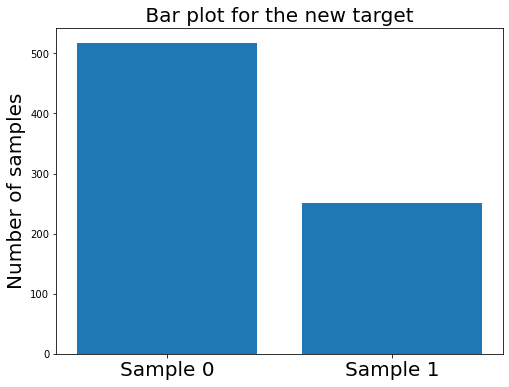

In [125]:
# Create a bar plot for the new target array to show the distribution 
#of the samples in two classes

import matplotlib.pyplot as plt

category = ['Sample 0', 'Sample 1'] # this list is used to create labels in the x axis
category_list = np.arange(0,2,1) # creates a list containing values [0, 1] used in the "bar" function

#list that holds counts of 1 and 0 in target array
sample_count = [(y==0).sum() , (y==1).sum()]

plt.figure(figsize=(8, 6))
plt.bar(category_list, sample_count)
plt.title(' Bar plot for the new target ', fontsize=20)
plt.ylabel('Number of samples', fontsize=20)
plt.xticks(range(len(category)), category, rotation=0, fontsize=20)
plt.show()

In [214]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report

#Create Train and Test Dataset

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)



In [215]:
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid1 = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn1_clf = KNeighborsClassifier()

knn1_cv = GridSearchCV(knn1_clf, param_grid1, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn1_cv.fit(X_train1, y_train1)


params_optimal_knn1 = knn1_cv.best_params_

print("Best Score: %f" % knn1_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn1)
print("\n")


Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score: 0.883987
Optimal Hyperparameter Values:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}




In [216]:
#use the optimal hyperparameter values to train a new model, as follows.

knn1 = KNeighborsClassifier(**params_optimal_knn1)

knn1.fit(X_train1, y_train1)

y_train1_predicted = knn1.predict(X_train1)

train_accuracy_knn1 = np.mean(y_train1_predicted == y_train1)
print("\nExperiment 1 Training Accuracy: ", train_accuracy_knn1)

# The accuracy of the model
y_test1_predicted = knn1.predict(X_test1)
test_accuracy_knn1 = knn1.score(X_test1, y_test1)
print("Experiment 1 Testng Accuracy: ", test_accuracy_knn1)

precision1 = precision_score(y_test1, y_test1_predicted) 
print("Experiment 1 Precision = %f" % precision1)

recall1 = recall_score(y_test1, y_test1_predicted)
print("Experiment 1 Recall = %f" % recall1)


f1_1 = f1_score(y_test1, y_test1_predicted)
print("Experiment 1 F1 Score = %f" % f1_1)

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test1, y_test1_predicted))



Experiment 1 Training Accuracy:  0.9576547231270358
Experiment 1 Testng Accuracy:  0.9090909090909091
Experiment 1 Precision = 0.905660
Experiment 1 Recall = 0.842105
Experiment 1 F1 Score = 0.872727

Confusion Matrix (Test Data):
 [[92  5]
 [ 9 48]]


# Experıment 2

In [350]:
#Create Train and Test Dataset

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train2)

# # Apply transform to both the training set and the test set.
X_train2 = scaler.transform(X_train2)
#X_test2 = scaler.transform(X_test2)

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid2 = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn2_clf = KNeighborsClassifier()

knn2_cv = GridSearchCV(knn2_clf, param_grid2, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn2_cv.fit(X_train2, y_train2)


params_optimal_knn2 = knn2_cv.best_params_

print("Best Score: %f" % knn2_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn2)
print("\n")


Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score: 0.928294
Optimal Hyperparameter Values:  {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}




In [351]:

#use the optimal hyperparameter values to train a new model, as follows.

knn2 = KNeighborsClassifier(**params_optimal_knn2)

knn2.fit(X_train2, y_train2)

y_train2_predicted = knn2.predict(X_train2)

train_accuracy_knn2 = np.mean(y_train2_predicted == y_train2)
print("\nExperiment 2 Training Accuracy: ", train_accuracy_knn2)

# The accuracy of the model
y_test2_predicted = knn2.predict(X_test2)
test_accuracy_knn2 = knn2.score(X_test2, y_test2)
print("Experiment 2 Accuracy: ", test_accuracy_knn2)

precision2 = precision_score(y_test2, y_test2_predicted) 
print("Experiment 2 Precision = %f" % precision2)

recall2 = recall_score(y_test2, y_test2_predicted)
print("Experiment 2 Recall = %f" % recall2)


f1_2 = f1_score(y_test2, y_test2_predicted)
print("Experiment 2 F1 Score = %f" % f1_2)

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test2, y_test2_predicted))


Experiment 2 Training Accuracy:  1.0
Experiment 2 Accuracy:  0.8961038961038961
Experiment 2 Precision = 0.872727
Experiment 2 Recall = 0.842105
Experiment 2 F1 Score = 0.857143

Confusion Matrix (Test Data):
 [[90  7]
 [ 9 48]]



FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.0047619  0.00714286 0.00714286 0.00714286 0.00714286
 0.00714286 0.00714286 0.00952381 0.00952381 0.00952381 0.00952381
 0.00952381 0.01190476 0.01190476 0.01428571 0.01428571 0.01428571
 0.01428571 0.01666667 0.01666667 0.01904762 0.01904762 0.01904762
 0.02142857 0.02142857 0.02380952 0.02380952 0.03095238 0.03095238
 0.03333333 0.04285714 0.04285714 0.0452381  0.0452381  0.04761905
 0.04761905 0.0547619  0.0547619  0.06666667 0.06666667 0.07380952
 0.07380952 0.07619048 0.07619048 0.07857143 0.07857143 0.09047619
 0.09047619 0.0952381  0.10238095 0.10714286 0.11190476 0.12142857
 0.12619048 0.13095238 0.13571429 0.1547619  1.        ]

TPR:  [0.         0.58762887 0.58762887 0.59793814 0.61340206 0.6185567
 0.62886598 0.6443299  0.65979381 0.67010309 0.67525773 0.71649485
 0.73195876 0.74226804 0.77835052 0.77835052 0.79381443 0.82474227
 0.82989691 0.82989691 0.88659794 0.88659794 0.89175258 0.90206186
 0.90206186 0.9

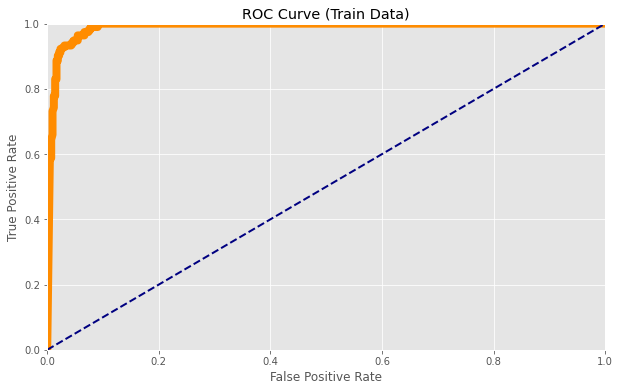

Area under the curve  0.989752086401571


In [218]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class

# Technique 1
y_scores2 = cross_val_predict(knn2, X_train2, y_train2, method="predict_proba", cv=5)[:, 1]


fpr2, tpr2, thresholds2 = roc_curve(y_train2, y_scores2)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr2)
print("\nTPR: ", tpr2)
print("\nThresholds: ", thresholds2)


#plot ROC Curve

plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr2, tpr2, label=None): 
    plt.plot(fpr2, tpr2, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title(label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr2, tpr2, "ROC Curve (Train Data)")
plt.show()

# Area under ROC curve
area2 = roc_auc_score(y_train2,y_scores2)
print("Area under the curve ", area2)

Precisions:  [0.8362069  0.83549784 0.83478261 0.83842795 0.84210526 0.84581498
 0.84955752 0.85333333 0.85267857 0.85650224 0.85585586 0.85972851
 0.85909091 0.8630137  0.86697248 0.87096774 0.87037037 0.86976744
 0.87383178 0.87793427 0.88207547 0.88625592 0.89047619 0.88995215
 0.88942308 0.88888889 0.89320388 0.89756098 0.90196078 0.90147783
 0.90594059 0.90547264 0.91       0.90954774 0.92820513 0.93298969
 0.93264249 0.94708995 0.94680851 0.94652406 0.9516129  0.95108696
 0.95628415 0.9558011  0.95555556 0.96089385 0.96067416 0.96045198
 0.96022727 0.96       0.95977011 0.95953757 0.95930233 0.95906433
 0.95882353 0.95857988 0.95833333 0.96407186 0.96385542 0.9625
 0.96226415 0.96202532 0.96178344 0.96794872 0.96774194 0.96753247
 0.96732026 0.96710526 0.96688742 0.96666667 0.96644295 0.97260274
 0.97241379 0.97222222 0.97202797 0.97163121 0.97122302 0.97080292
 0.97037037 0.97014925 0.96969697 0.9765625  0.97637795 0.97619048
 0.976      0.97560976 0.97540984 0.97478992 0.974576

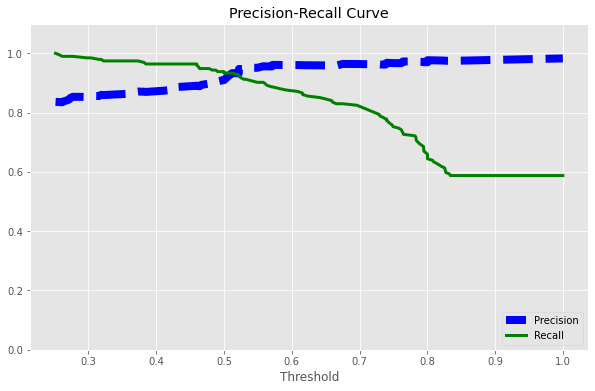

Optimal Threshold:  0.5120419130188912


In [194]:
#The Precision-Recall (PR) curve for the model of experiment 2

precisions2, recalls2, thresholds2 = precision_recall_curve(y_train2, y_scores2)

print("Precisions: ", precisions2)
print("\nRecalls: ", recalls2)
print("\nThresholds: ", thresholds2)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2): 
    plt.plot(thresholds2, precisions2[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds2, recalls2[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2)
plt.show()


threshold_optimal2 = -1
for i in range(len(precisions2)):
    if(precisions2[i] == recalls2[i]):
        threshold_optimal2 = thresholds2[i]

if(threshold_optimal2 == -1):
    print("Find the optimal threshold manually from the precision-recall curve")
else:
    print("Optimal Threshold: ", threshold_optimal2)

In [225]:
print("Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):")

#Standardization
# Fit on training set only.
scaler.fit(X_train2)

# # Apply transform to both the training set and the test set.
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)


#train with optimal hyperparmeter from Exp. 2
knn2_new = KNeighborsClassifier(**params_optimal_knn2)
knn2_new.fit(X_train2, y_train2)

# Precision, Recall, F1 Score and Confusion Matrix for different threshold

# t = threshold_optimal # optimal threshold from precision-recall curve 

t = 0.5120419130188912 

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted2_new = (cross_val_predict(knn2_new, X_train2, y_train2, method="predict_proba", cv=3)[:,1] > t).astype(int)

train_accuracy_knn2_new = np.mean(y_train_predicted2_new == y_train2)

print("\nTraining Accuracy after using optimal threshold: ", train_accuracy_knn2_new)

y_test_predicted2_new = (knn2_new.predict_proba(X_test2)[:,1] > t).astype(int)

test_accuracy_knn2_new = np.mean(y_test2 == y_test_predicted2_new)

print("\nTest Accuracy after using optimal threshold: ", test_accuracy_knn2_new)


precision_test2_new = precision_score(y_test2, y_test_predicted2_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision_test2_new))

recall2_new = recall_score(y_test2, y_test_predicted2_new)
print("Recall (Threshold %.2f) = %f" % (t, recall2_new))


f1_2_new = f1_score(y_test2, y_test_predicted2_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1_2_new))

print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_test2, y_test_predicted2_new))


Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):

Training Accuracy after using optimal threshold:  0.9429967426710097

Test Accuracy after using optimal threshold:  0.9025974025974026

Precision (Threshold 0.51) = 0.888889
Recall (Threshold 0.51) = 0.842105
F1 Score = (Threshold 0.51) = 0.864865
Confusion Matrix (Threshold 0.51)
[[91  6]
 [ 9 48]]


# Numerical Correlations with the Target Column

In [226]:
df_main.corr()['Y'].sort_values(ascending=False)

Y     1.000000
X5    0.696773
X1    0.488035
X3    0.365033
X7    0.214180
X8    0.061007
X6    0.028554
X2   -0.521961
X4   -0.685280
Name: Y, dtype: float64

# Experiment 4 Subset 1

In [328]:
# df is df_copy in my program

x_data_subset_1 = df_copy[['X1', 'X2', 'X4','X7']]
y_data_subset_1 = df_copy['Y']

print("Data frame X:")
print(x_data_subset_1)
print("\nData frame y:")
print(y_data_subset_1)


Xs1 = np.asarray(x_data_subset_1) # Data Matrix containing all features excluding the target
ys1 = np.asarray(y_data_subset_1) # 1D target array

print("X Data Shape: ", Xs1.shape)
print("y Data Shape: ", ys1.shape)

print("X Data Type: ", Xs1.dtype)
print("y Data Type: ", ys1.dtype)

#Create Train and Test Dataset

X_train_subset_1, X_test_subset_1, y_train_subset_1, y_test_subset_1 = train_test_split(Xs1, ys1, test_size=0.2, random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_subset_1)

# # Apply transform to both the training set and the test set.
X_train_subset_1 = scaler.transform(X_train_subset_1)
X_test_subset_1 = scaler.transform(X_test_subset_1)

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid2 = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn_S1_clf = KNeighborsClassifier()

knn_S1_cv = GridSearchCV(knn_S1_clf, param_grid2, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_S1_cv.fit(X_train_subset_1, y_train_subset_1)


params_optimal_knn_S1 = knn_S1_cv.best_params_

print("Best Score: %f" % knn_S1_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_S1)
print("\n")

#use the optimal hyperparameter values to train a new model, as follows.

knn_S1 = KNeighborsClassifier(**params_optimal_knn_S1)

knn_S1.fit(X_train_subset_1, y_train_subset_1)

y_train_S1_predicted = knn_S1.predict(X_train_subset_1)

train_accuracy_knn_S1 = np.mean(y_train_S1_predicted == y_train_subset_1)
print("\nExperiment 2 Training Accuracy: ", train_accuracy_knn_S1)

# The accuracy of the model
y_test_S1_predicted = knn_S1.predict(X_test_subset_1)
test_accuracy_knn_S1 = knn_S1.score(X_test_subset_1, y_test_subset_1)
print("Experiment 2 Accuracy: ", test_accuracy_knn_S1)

precision_S1 = precision_score(y_test_subset_1, y_test_S1_predicted) 
print("Experiment 2 Precision = %f" % precision_S1)

recall_S1 = recall_score(y_test_subset_1, y_test_S1_predicted)
print("Experiment 2 Recall = %f" % recall_S1)


f1_S1 = f1_score(y_test_subset_1, y_test_S1_predicted)
print("Experiment 2 F1 Score = %f" % f1_S1)

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_subset_1, y_test_S1_predicted))




Data frame X:
       X1     X2      X4   X7
0    0.98  514.5  110.25  0.0
1    0.98  514.5  110.25  0.0
2    0.98  514.5  110.25  0.0
3    0.98  514.5  110.25  0.0
4    0.90  563.5  122.50  0.0
..    ...    ...     ...  ...
763  0.64  784.0  220.50  0.4
764  0.62  808.5  220.50  0.4
765  0.62  808.5  220.50  0.4
766  0.62  808.5  220.50  0.4
767  0.62  808.5  220.50  0.4

[768 rows x 4 columns]

Data frame y:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y, Length: 768, dtype: int32
X Data Shape:  (768, 4)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  int32
Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score: 0.900230
Optimal Hyperparameter Values:  {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}



Experiment 2 Training Accuracy:  0.9267100977198697
Experiment 2 Accuracy:  0.948051948051948
Experiment 2 Precision = 0.915254
Experiment 2 Recall = 0.947368
Experiment 2 F1 Score = 0.931034

Con

# Experiment 4 Subset 2


In [329]:
# df is df_copy in my program

x_data_subset_2 = df_copy[['X1', 'X3', 'X5','X7']]
y_data_subset_2 = df_copy['Y']

print("Data frame X:")
print(x_data_subset_2)
print("\nData frame y:")
print(y_data_subset_2)


Xs2 = np.asarray(x_data_subset_2) # Data Matrix containing all features excluding the target
ys2 = np.asarray(y_data_subset_2) # 1D target array

print("X Data Shape: ", Xs2.shape)
print("y Data Shape: ", ys2.shape)

print("X Data Type: ", Xs2.dtype)
print("y Data Type: ", ys2.dtype)

#Create Train and Test Dataset

X_train_subset_2, X_test_subset_2, y_train_subset_2, y_test_subset_2 = train_test_split(Xs2, ys2, test_size=0.2, random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_subset_2)

# # Apply transform to both the training set and the test set.
X_train_subset_2 = scaler.transform(X_train_subset_2)
X_test_subset_2 = scaler.transform(X_test_subset_2)

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid2 = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn_S2_clf = KNeighborsClassifier()

knn_S2_cv = GridSearchCV(knn_S2_clf, param_grid2, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_S2_cv.fit(X_train_subset_2, y_train_subset_2)


params_optimal_knn_S2 = knn_S2_cv.best_params_

print("Best Score: %f" % knn_S2_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_S2)
print("\n")

#use the optimal hyperparameter values to train a new model, as follows.

knn_S2 = KNeighborsClassifier(**params_optimal_knn_S2)

knn_S2.fit(X_train_subset_2, y_train_subset_2)

y_train_S2_predicted = knn_S2.predict(X_train_subset_2)

train_accuracy_knn_S2 = np.mean(y_train_S2_predicted == y_train_subset_2)
print("\nExperiment 2 Training Accuracy: ", train_accuracy_knn_S2)

# The accuracy of the model
y_test_S2_predicted = knn_S2.predict(X_test_subset_2)
test_accuracy_knn_S2 = knn_S2.score(X_test_subset_2, y_test_subset_2)
print("Experiment 2 Accuracy: ", test_accuracy_knn_S2)

precision_S2 = precision_score(y_test_subset_2, y_test_S2_predicted) 
print("Experiment 2 Precision = %f" % precision_S2)

recall_S2 = recall_score(y_test_subset_2, y_test_S2_predicted)
print("Experiment 2 Recall = %f" % recall_S2)


f1_S2 = f1_score(y_test_subset_2, y_test_S2_predicted)
print("Experiment 2 F1 Score = %f" % f1_S2)

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_subset_2, y_test_S2_predicted))




Data frame X:
       X1     X3   X5   X7
0    0.98  294.0  7.0  0.0
1    0.98  294.0  7.0  0.0
2    0.98  294.0  7.0  0.0
3    0.98  294.0  7.0  0.0
4    0.90  318.5  7.0  0.0
..    ...    ...  ...  ...
763  0.64  343.0  3.5  0.4
764  0.62  367.5  3.5  0.4
765  0.62  367.5  3.5  0.4
766  0.62  367.5  3.5  0.4
767  0.62  367.5  3.5  0.4

[768 rows x 4 columns]

Data frame y:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y, Length: 768, dtype: int32
X Data Shape:  (768, 4)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  int32
Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score: 0.897169
Optimal Hyperparameter Values:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}



Experiment 2 Training Accuracy:  0.9364820846905537
Experiment 2 Accuracy:  0.9090909090909091
Experiment 2 Precision = 0.890909
Experiment 2 Recall = 0.859649
Experiment 2 F1 Score = 0.875000

Confusion Matrix (Test Data):
 [[91  6

# Experiment 4 Subset 3

In [332]:
# df is df_copy in my program

x_data_subset_3 = df_copy[['X1', 'X3', 'X4','X7']]
y_data_subset_3 = df_copy['Y']

print("Data frame X:")
print(x_data_subset_3)
print("\nData frame y:")
print(y_data_subset_3)


Xs3 = np.asarray(x_data_subset_3) # Data Matrix containing all features excluding the target
ys3 = np.asarray(y_data_subset_3) # 1D target array

print("X Data Shape: ", Xs3.shape)
print("y Data Shape: ", ys3.shape)

print("X Data Type: ", Xs3.dtype)
print("y Data Type: ", ys3.dtype)

#Create Train and Test Dataset

X_train_subset_3, X_test_subset_3, y_train_subset_3, y_test_subset_3 = train_test_split(Xs3, ys3, test_size=0.2, random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_subset_3)

# # Apply transform to both the training set and the test set.
X_train_subset_3 = scaler.transform(X_train_subset_3)
X_test_subset_3 = scaler.transform(X_test_subset_3)

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid2 = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn_S3_clf = KNeighborsClassifier()

knn_S3_cv = GridSearchCV(knn_S3_clf, param_grid2, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_S3_cv.fit(X_train_subset_3, y_train_subset_3)


params_optimal_knn_S3 = knn_S3_cv.best_params_

print("Best Score: %f" % knn_S3_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_S3)
print("\n")

#use the optimal hyperparameter values to train a new model, as follows.

knn_S3 = KNeighborsClassifier(**params_optimal_knn_S3)

knn_S3.fit(X_train_subset_3, y_train_subset_3)

y_train_S3_predicted = knn_S3.predict(X_train_subset_3)

train_accuracy_knn_S3 = np.mean(y_train_S3_predicted == y_train_subset_3)
print("\nExperiment 2 Training Accuracy: ", train_accuracy_knn_S3)

# The accuracy of the model
y_test_S3_predicted = knn_S3.predict(X_test_subset_3)
test_accuracy_knn_S3 = knn_S3.score(X_test_subset_3, y_test_subset_3)
print("Experiment 2 Accuracy: ", test_accuracy_knn_S3)

precision_S3 = precision_score(y_test_subset_3, y_test_S3_predicted) 
print("Experiment 2 Precision = %f" % precision_S3)

recall_S3 = recall_score(y_test_subset_3, y_test_S3_predicted)
print("Experiment 2 Recall = %f" % recall_S3)


f1_S3 = f1_score(y_test_subset_3, y_test_S3_predicted)
print("Experiment 2 F1 Score = %f" % f1_S3)

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_subset_3, y_test_S3_predicted))



Data frame X:
       X1     X3      X4   X7
0    0.98  294.0  110.25  0.0
1    0.98  294.0  110.25  0.0
2    0.98  294.0  110.25  0.0
3    0.98  294.0  110.25  0.0
4    0.90  318.5  122.50  0.0
..    ...    ...     ...  ...
763  0.64  343.0  220.50  0.4
764  0.62  367.5  220.50  0.4
765  0.62  367.5  220.50  0.4
766  0.62  367.5  220.50  0.4
767  0.62  367.5  220.50  0.4

[768 rows x 4 columns]

Data frame y:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y, Length: 768, dtype: int32
X Data Shape:  (768, 4)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  int32
Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score: 0.903962
Optimal Hyperparameter Values:  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}



Experiment 2 Training Accuracy:  0.9364820846905537
Experiment 2 Accuracy:  0.9090909090909091
Experiment 2 Precision = 0.890909
Experiment 2 Recall = 0.859649
Experiment 2 F1 Score = 0.875000

C

# Experiment 4 Subset 4

In [335]:
# df is df_copy in my program

x_data_subset_4 = df_copy[['X1', 'X2', 'X5','X7','X8']]
y_data_subset_4 = df_copy['Y']

print("Data frame X:")
print(x_data_subset_4)
print("\nData frame y:")
print(y_data_subset_4)


Xs4 = np.asarray(x_data_subset_4) # Data Matrix containing all features excluding the target
ys4 = np.asarray(y_data_subset_4) # 1D target array

print("X Data Shape: ", Xs4.shape)
print("y Data Shape: ", ys4.shape)

print("X Data Type: ", Xs4.dtype)
print("y Data Type: ", ys4.dtype)

#Create Train and Test Dataset

X_train_subset_4, X_test_subset_4, y_train_subset_4, y_test_subset_4 = train_test_split(Xs4, ys4, test_size=0.2, random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_subset_4)

# # Apply transform to both the training set and the test set.
X_train_subset_4 = scaler.transform(X_train_subset_4)
X_test_subset_4 = scaler.transform(X_test_subset_4)

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid2 = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn_S4_clf = KNeighborsClassifier()

knn_S4_cv = GridSearchCV(knn_S4_clf, param_grid2, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_S4_cv.fit(X_train_subset_4, y_train_subset_4)


params_optimal_knn_S4 = knn_S4_cv.best_params_

print("Best Score: %f" % knn_S4_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_S4)
print("\n")

#use the optimal hyperparameter values to train a new model, as follows.

knn_S4 = KNeighborsClassifier(**params_optimal_knn_S4)

knn_S4.fit(X_train_subset_4, y_train_subset_4)

y_train_S4_predicted = knn_S4.predict(X_train_subset_4)

train_accuracy_knn_S4 = np.mean(y_train_S4_predicted == y_train_subset_4)
print("\nExperiment 2 Training Accuracy: ", train_accuracy_knn_S4)

# The accuracy of the model
y_test_S4_predicted = knn_S4.predict(X_test_subset_4)
test_accuracy_knn_S4 = knn_S4.score(X_test_subset_4, y_test_subset_4)
print("Experiment 2 Accuracy: ", test_accuracy_knn_S4)

precision_S4 = precision_score(y_test_subset_4, y_test_S4_predicted) 
print("Experiment 2 Precision = %f" % precision_S4)

recall_S4 = recall_score(y_test_subset_4, y_test_S4_predicted)
print("Experiment 2 Recall = %f" % recall_S4)


f1_S4 = f1_score(y_test_subset_4, y_test_S4_predicted)
print("Experiment 2 F1 Score = %f" % f1_S4)

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_subset_4, y_test_S4_predicted))



Data frame X:
       X1     X2   X5   X7  X8
0    0.98  514.5  7.0  0.0   0
1    0.98  514.5  7.0  0.0   0
2    0.98  514.5  7.0  0.0   0
3    0.98  514.5  7.0  0.0   0
4    0.90  563.5  7.0  0.0   0
..    ...    ...  ...  ...  ..
763  0.64  784.0  3.5  0.4   5
764  0.62  808.5  3.5  0.4   5
765  0.62  808.5  3.5  0.4   5
766  0.62  808.5  3.5  0.4   5
767  0.62  808.5  3.5  0.4   5

[768 rows x 5 columns]

Data frame y:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y, Length: 768, dtype: int32
X Data Shape:  (768, 5)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  int32
Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score: 0.879992
Optimal Hyperparameter Values:  {'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}



Experiment 2 Training Accuracy:  0.9283387622149837
Experiment 2 Accuracy:  0.9155844155844156
Experiment 2 Precision = 0.879310
Experiment 2 Recall = 0.894737
Experiment 2 F1 Score =

# Test of 163 Subsets formed from all possible combination with atleast four feature

In [ ]:
# All_four_possible_features = [['X1', 'X2', 'X3', 'X4'], ['X1', 'X2', 'X3', 'X5'], ['X1', 'X2', 'X4', 'X5'], ['X1', 'X3', 'X4', 'X5'], ['X2', 'X3', 'X4', 'X5'], ['X1', 'X2', 'X3', 'X6'], ['X1', 'X2', 'X4', 'X6'], ['X1', 'X3', 'X4', 'X6'], ['X2', 'X3', 'X4', 'X6'], ['X1', 'X2', 'X5', 'X6'], ['X1', 'X3', 'X5', 'X6'], ['X2', 'X3', 'X5', 'X6'], ['X1', 'X4', 'X5', 'X6'], ['X2', 'X4', 'X5', 'X6'], ['X3', 'X4', 'X5', 'X6'], ['X1', 'X2', 'X3', 'X7'], ['X1', 'X2', 'X4', 'X7'], ['X1', 'X3', 'X4', 'X7'], ['X2', 'X3', 'X4', 'X7'], ['X1', 'X2', 'X5', 'X7'], ['X1', 'X3', 'X5', 'X7'], ['X2', 'X3', 'X5', 'X7'], ['X1', 'X4', 'X5', 'X7'], ['X2', 'X4', 'X5', 'X7'], ['X3', 'X4', 'X5', 'X7'], ['X1', 'X2', 'X6', 'X7'], ['X1', 'X3', 'X6', 'X7'], ['X2', 'X3', 'X6', 'X7'], ['X1', 'X4', 'X6', 'X7'], ['X2', 'X4', 'X6', 'X7'], ['X3', 'X4', 'X6', 'X7'], ['X1', 'X5', 'X6', 'X7'], ['X2', 'X5', 'X6', 'X7'], ['X3', 'X5', 'X6', 'X7'], ['X4', 'X5', 'X6', 'X7'], ['X1', 'X2', 'X3', 'X8'], ['X1', 'X2', 'X4', 'X8'], ['X1', 'X3', 'X4', 'X8'], ['X2', 'X3', 'X4', 'X8'], ['X1', 'X2', 'X5', 'X8'], ['X1', 'X3', 'X5', 'X8'], ['X2', 'X3', 'X5', 'X8'], ['X1', 'X4', 'X5', 'X8'], ['X2', 'X4', 'X5', 'X8'], ['X3', 'X4', 'X5', 'X8'], ['X1', 'X2', 'X6', 'X8'], ['X1', 'X3', 'X6', 'X8'], ['X2', 'X3', 'X6', 'X8'], ['X1', 'X4', 'X6', 'X8'], ['X2', 'X4', 'X6', 'X8'], ['X3', 'X4', 'X6', 'X8'], ['X1', 'X5', 'X6', 'X8'], ['X2', 'X5', 'X6', 'X8'], ['X3', 'X5', 'X6', 'X8'], ['X4', 'X5', 'X6', 'X8'], ['X1', 'X2', 'X7', 'X8'], ['X1', 'X3', 'X7', 'X8'], ['X2', 'X3', 'X7', 'X8'], ['X1', 'X4', 'X7', 'X8'], ['X2', 'X4', 'X7', 'X8'], ['X3', 'X4', 'X7', 'X8'], ['X1', 'X5', 'X7', 'X8'], ['X2', 'X5', 'X7', 'X8'], ['X3', 'X5', 'X7', 'X8'], ['X4', 'X5', 'X7', 'X8'], ['X1', 'X6', 'X7', 'X8'], ['X2', 'X6', 'X7', 'X8'], ['X3', 'X6', 'X7', 'X8'], ['X4', 'X6', 'X7', 'X8'], ['X5', 'X6', 'X7', 'X8'],['X1', 'X2', 'X3', 'X4', 'X5'], ['X1', 'X2', 'X3', 'X4', 'X6'], ['X1', 'X2', 'X3', 'X5', 'X6'], ['X1', 'X2', 'X4', 'X5', 'X6'], ['X1', 'X3', 'X4', 'X5', 'X6'], ['X2', 'X3', 'X4', 'X5', 'X6'], ['X1', 'X2', 'X3', 'X4', 'X7'], ['X1', 'X2', 'X3', 'X5', 'X7'], ['X1', 'X2', 'X4', 'X5', 'X7'], ['X1', 'X3', 'X4', 'X5', 'X7'], ['X2', 'X3', 'X4', 'X5', 'X7'], ['X1', 'X2', 'X3', 'X6', 'X7'], ['X1', 'X2', 'X4', 'X6', 'X7'], ['X1', 'X3', 'X4', 'X6', 'X7'], ['X2', 'X3', 'X4', 'X6', 'X7'], ['X1', 'X2', 'X5', 'X6', 'X7'], ['X1', 'X3', 'X5', 'X6', 'X7'], ['X2', 'X3', 'X5', 'X6', 'X7'], ['X1', 'X4', 'X5', 'X6', 'X7'], ['X2', 'X4', 'X5', 'X6', 'X7'], ['X3', 'X4', 'X5', 'X6', 'X7'], ['X1', 'X2', 'X3', 'X4', 'X8'], ['X1', 'X2', 'X3', 'X5', 'X8'], ['X1', 'X2', 'X4', 'X5', 'X8'], ['X1', 'X3', 'X4', 'X5', 'X8'], ['X2', 'X3', 'X4', 'X5', 'X8'], ['X1', 'X2', 'X3', 'X6', 'X8'], ['X1', 'X2', 'X4', 'X6', 'X8'], ['X1', 'X3', 'X4', 'X6', 'X8'], ['X2', 'X3', 'X4', 'X6', 'X8'], ['X1', 'X2', 'X5', 'X6', 'X8'], ['X1', 'X3', 'X5', 'X6', 'X8'], ['X2', 'X3', 'X5', 'X6', 'X8'], ['X1', 'X4', 'X5', 'X6', 'X8'], ['X2', 'X4', 'X5', 'X6', 'X8'], ['X3', 'X4', 'X5', 'X6', 'X8'], ['X1', 'X2', 'X3', 'X7', 'X8'], ['X1', 'X2', 'X4', 'X7', 'X8'], ['X1', 'X3', 'X4', 'X7', 'X8'], ['X2', 'X3', 'X4', 'X7', 'X8'], ['X1', 'X2', 'X5', 'X7', 'X8'], ['X1', 'X3', 'X5', 'X7', 'X8'], ['X2', 'X3', 'X5', 'X7', 'X8'], ['X1', 'X4', 'X5', 'X7', 'X8'], ['X2', 'X4', 'X5', 'X7', 'X8'], ['X3', 'X4', 'X5', 'X7', 'X8'], ['X1', 'X2', 'X6', 'X7', 'X8'], ['X1', 'X3', 'X6', 'X7', 'X8'], ['X2', 'X3', 'X6', 'X7', 'X8'], ['X1', 'X4', 'X6', 'X7', 'X8'], ['X2', 'X4', 'X6', 'X7', 'X8'], ['X3', 'X4', 'X6', 'X7', 'X8'], ['X1', 'X5', 'X6', 'X7', 'X8'], ['X2', 'X5', 'X6', 'X7', 'X8'], ['X3', 'X5', 'X6', 'X7', 'X8'], ['X4', 'X5', 'X6', 'X7', 'X8'],['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], ['X1', 'X2', 'X3', 'X4', 'X5', 'X7'], ['X1', 'X2', 'X3', 'X4', 'X6', 'X7'], ['X1', 'X2', 'X3', 'X5', 'X6', 'X7'], ['X1', 'X2', 'X4', 'X5', 'X6', 'X7'], ['X1', 'X3', 'X4', 'X5', 'X6', 'X7'], ['X2', 'X3', 'X4', 'X5', 'X6', 'X7'], ['X1', 'X2', 'X3', 'X4', 'X5', 'X8'], ['X1', 'X2', 'X3', 'X4', 'X6', 'X8'], ['X1', 'X2', 'X3', 'X5', 'X6', 'X8'], ['X1', 'X2', 'X4', 'X5', 'X6', 'X8'], ['X1', 'X3', 'X4', 'X5', 'X6', 'X8'], ['X2', 'X3', 'X4', 'X5', 'X6', 'X8'], ['X1', 'X2', 'X3', 'X4', 'X7', 'X8'], ['X1', 'X2', 'X3', 'X5', 'X7', 'X8'], ['X1', 'X2', 'X4', 'X5', 'X7', 'X8'], ['X1', 'X3', 'X4', 'X5', 'X7', 'X8'], ['X2', 'X3', 'X4', 'X5', 'X7', 'X8'], ['X1', 'X2', 'X3', 'X6', 'X7', 'X8'], ['X1', 'X2', 'X4', 'X6', 'X7', 'X8'], ['X1', 'X3', 'X4', 'X6', 'X7', 'X8'], ['X2', 'X3', 'X4', 'X6', 'X7', 'X8'], ['X1', 'X2', 'X5', 'X6', 'X7', 'X8'], ['X1', 'X3', 'X5', 'X6', 'X7', 'X8'], ['X2', 'X3', 'X5', 'X6', 'X7', 'X8'], ['X1', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X2', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8'],['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X8'], ['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8'], ['X1', 'X2', 'X3', 'X5', 'X6', 'X7', 'X8'], ['X1', 'X2', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'],
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]

records = []
for feature in All_four_possible_features:
    
# df is df_copy in my program

 x_data_subset_4 = df_copy[feature]
 y_data_subset_4 = df_copy['Y']

 print("Data frame X:")
 print(x_data_subset_4)
 print("\nData frame y:")
 print(y_data_subset_4)


 Xs4 = np.asarray(x_data_subset_4) # Data Matrix containing all features excluding the target
 ys4 = np.asarray(y_data_subset_4) # 1D target array

 print("X Data Shape: ", Xs4.shape)
 print("y Data Shape: ", ys4.shape)

 print("X Data Type: ", Xs4.dtype)
 print("y Data Type: ", ys4.dtype)

#Create Train and Test Dataset

 X_train_subset_4, X_test_subset_4, y_train_subset_4, y_test_subset_4 = train_test_split(Xs4, ys4, test_size=0.2, random_state=0)

 scaler = StandardScaler()

# Fit on training set only.
 scaler.fit(X_train_subset_4)

# # Apply transform to both the training set and the test set.
 X_train_subset_4 = scaler.transform(X_train_subset_4)
 X_test_subset_4 = scaler.transform(X_test_subset_4)

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
 param_grid2 = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

 knn_S4_clf = KNeighborsClassifier()

 knn_S4_cv = GridSearchCV(knn_S4_clf, param_grid2, scoring='f1', cv=5, verbose=1, n_jobs=-1)
 knn_S4_cv.fit(X_train_subset_4, y_train_subset_4)


 params_optimal_knn_S4 = knn_S4_cv.best_params_

 print("Best Score: %f" % knn_S4_cv.best_score_)
 print("Optimal Hyperparameter Values: ", params_optimal_knn_S4)
 print("\n")

#use the optimal hyperparameter values to train a new model, as follows.

 knn_S4 = KNeighborsClassifier(**params_optimal_knn_S4)

 knn_S4.fit(X_train_subset_4, y_train_subset_4)

 y_train_S4_predicted = knn_S4.predict(X_train_subset_4)

 train_accuracy_knn_S4 = np.mean(y_train_S4_predicted == y_train_subset_4)
 print("\nExperiment 2 Training Accuracy: ", train_accuracy_knn_S4)

# The accuracy of the model
 y_test_S4_predicted = knn_S4.predict(X_test_subset_4)
 test_accuracy_knn_S4 = knn_S4.score(X_test_subset_4, y_test_subset_4)
 print("Experiment 2 Accuracy: ", test_accuracy_knn_S4)

 precision_S4 = precision_score(y_test_subset_4, y_test_S4_predicted) 
 print("Experiment 2 Precision = %f" % precision_S4)

 recall_S4 = recall_score(y_test_subset_4, y_test_S4_predicted)
 print("Experiment 2 Recall = %f" % recall_S4)


 f1_S4 = f1_score(y_test_subset_4, y_test_S4_predicted)
 print("Experiment 2 F1 Score = %f" % f1_S4)

# Confusion Matrix
 print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_subset_4, y_test_S4_predicted))
 records.append([feature,params_optimal_knn_S4, train_accuracy_knn_S4, test_accuracy_knn_S4, precision_S4, recall_S4, f1_S4,confusion_matrix(y_test_subset_4, y_test_S4_predicted) ])
 

# Finding specific KNN models from 163 KNN subset models with higher test accuracies 

In [344]:
#Extract all the test accuracy values from all the feature subset and respective result

extract_all_test_accuracy_values = []
i =0
for k in records:
  
    extract_all_test_accuracy_values.append(records[i][3]) 
    i = i+1
    
#find the feature combination with higher  test accuracies

combination = []

for comb in extract_all_test_accuracy_values  :

 if comb > 0.9:
    
    combination.append(extract_all_test_accuracy_values .index(comb))
    
combination

[16,
 17,
 18,
 19,
 17,
 18,
 17,
 17,
 19,
 18,
 17,
 18,
 82,
 17,
 82,
 17,
 110,
 82,
 19,
 82,
 17,
 110,
 17,
 17,
 82,
 82,
 110,
 17]

# Part B: Classification of Unstructured Data

In [ ]:
#Loads the CIFAR10 dataset

import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [393]:
!pip install tensorflow